# Assignment 2


# Testing the difference between a Binomial/Poisson distribution and a Gaussian distribution as you change the parameters of the Binomial/Poisson using: 
    
    1) KS
    
    2) AD
    
    3) KL
    
    4) Pearson's chisq (not done in this example)
    
    I want you to use the scipy.stats package for this. For KS (Kolmogorov-Smirnoff) and AD (Anderson Darling) you simply need to generate the distribution against which you can test a normal (Gaussian) distribution: the KS and AD functions in scipy have functionality to test against standard distributions (normal, chisq etc) without you having to code up anything about the distribution itself. KL divergence test and chi square test do not. 

In [1]:
%matplotlib inline
from __future__ import print_function, division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import scipy.stats

In [2]:
#this makes my plots pretty!
#you can kill this cell if it cause error
import json
os.system("curl -O https://raw.githubusercontent.com/fedhere/UInotebooks/master/fbb_matplotlibrc.json")
os.system("mv " + "fbb_matplotlibrc.json " + os.getenv("PUIDATA"))
s = json.load( open(os.getenv ('PUIDATA')+"/fbb_matplotlibrc.json") )
plt.rcParams.update(s)


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/__init__.py:913: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/__init__.py:913: UserWarning: svg.embed_char_paths is deprecated and replaced with svg.fonttype; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


Here are the manual pages for the three tests I am going to use. _scipy_ does not have the best documentation, but generally it provides clear examples of use for its functions. Read the documentation carefully.

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kstest.html#scipy.stats.kstest
http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.anderson.html#scipy.stats.anderson
http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.entropy.html#scipy.stats.entropy

# AD and KS test

I need to figure out what each test function returns. Let me run them once testing an obvious result: is a Gaussian Gaussian? I know the answer so this is a reality check to make sure I understand the output of the functions (and read the manual at the same time!)

I am testing a normal distribution (Gaussian, mean = 0, std = 1) against a Gaussian model, and a Poisson with small $lambda$, or a binomial _w small np against a Gaussian model_. I expect to find that in the first case the Gaussian is, well, Gaussian and in the second case that the binomial with small np is NOT Gaussian

In [3]:
#generate the distribution
alpha = 0.05
np.random.seed(999)
dist_n = np.random.randn(1000) 

#test ad and ks. those are easy
print ("normal on normal", scipy.stats.kstest(dist_n,'norm'))
print ("normal on normal", scipy.stats.anderson(dist_n, dist='norm'))
print ("") 

normal on normal KstestResult(statistic=0.016344431331899001, pvalue=0.95212890203293565)
normal on normal AndersonResult(statistic=0.26231814126674635, critical_values=array([ 0.574,  0.653,  0.784,  0.914,  1.088]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))



KS: high p-value pvalue>0.05: H0 that sample comes from a Gaussian distribution cannot be rejected

AD: at alpha = 0.05 the statistics = 0.26 is smaller than the 0.784 critical value for $alpha$=0.05 (thresh_0.05 = 0.784): the H0 cannot be rejected.

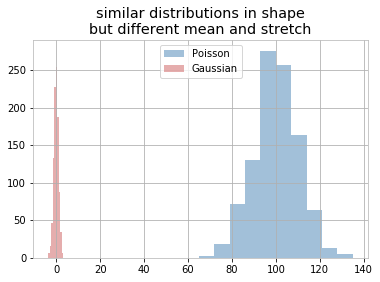

poisson on normal KstestResult(statistic=1.0, pvalue=0.0)
poisson on normal AndersonResult(statistic=0.72428815547573322, critical_values=array([ 0.574,  0.653,  0.784,  0.914,  1.088]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))


In this case the means are different, so the distributions will be different for KS and AD test. I want a distribution with 'Poisson with high mean' shape cause that is more Gaussianbut I want the mean to be the same as for my Gaussian: mean=0. Similarly, the standard deviation is sqrt(lambda) = sqrt(100). I want it to be 1


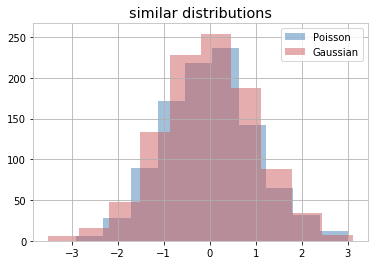

poisson vs normal KstestResult(statistic=0.030537538725986857, pvalue=0.30353169660170898)
poisson vs normal AndersonResult(statistic=0.92641226504883889, critical_values=array([ 0.574,  0.653,  0.784,  0.914,  1.088]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))
KS: lower p-value but still rejecting the H0 at alpha=0.05
AD: statistics AD=0.92 larger than threshold (for alpha=0.05) 
thresh_0.05 = 0.784


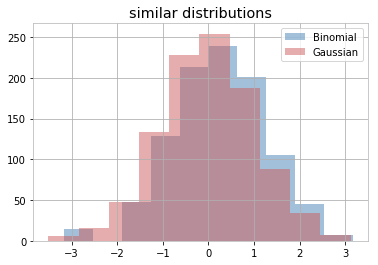

binomial vs normal KstestResult(statistic=0.14200000000000002, pvalue=0.0)
binomial vs normal AndersonResult(statistic=15.852273853456609, critical_values=array([ 0.574,  0.653,  0.784,  0.914,  1.088]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))
 what does the result of each test say??


In [4]:
np.random.seed(999)
# poisson with 1000 elements, lambda=100 (high)
dist_p = np.random.poisson(100, 1000)
plt.figure()
plt.hist(dist_p, alpha=0.5, label="Poisson")
plt.hist(dist_n, alpha=0.5, label="Gaussian")
plt.legend()
plt.title("similar distributions in shape\nbut different mean and stretch")
plt.show()
print ("poisson on normal", scipy.stats.kstest(dist_p,'norm'))
print ("poisson on normal", scipy.stats.anderson(dist_p, dist='norm'))
print ("\n\nIn this case the means are different, " + 
       "so the distributions will be different for KS and AD test. " + 
       "I want a distribution with 'Poisson with high mean' shape cause that is more Gaussian" + 
       "but I want the mean to be the same as for my Gaussian: mean=0. "
       "Similarly, the standard deviation is sqrt(lambda) = sqrt(100). I want it to be 1") 


dist_p = (np.random.poisson(100, 1000) - 100) * 0.1 #-100 fixes mean, *0.1 fixes stdev
plt.figure()
plt.hist(dist_p, alpha=0.5, label="Poisson")
plt.hist(dist_n, alpha=0.5, label="Gaussian")
plt.legend()
plt.title("similar distributions")
plt.show()

print ("poisson vs normal", scipy.stats.kstest(dist_p,'norm'))
print ("poisson vs normal", scipy.stats.anderson(dist_p, dist='norm'))
print ("KS: lower p-value but still rejecting the H0 at alpha=0.05") 
print ("AD: statistics AD=0.92 larger than threshold (for alpha=0.05) ") 


threshold = scipy.stats.anderson(dist_n, 
                                 dist='norm')[1][scipy.stats.anderson(dist_n, 
                                                                      dist='norm')[2]==[5.0]]
print ("thresh_0.05 =", threshold[0])

#binomial with n=10, p=0.5 => mean=np=5, stdev=sqrt(np(1-p))
n, p = 10, 0.5
dist_b = (np.random.binomial(n, p, 1000) - n*p) / np.sqrt(n*p*(1-p))  #subtract mean divide by stdev
plt.figure()
plt.hist(dist_b, alpha=0.5, label="Binomial")
plt.hist(dist_n, alpha=0.5, label="Gaussian")
plt.legend()
plt.title("similar distributions")
plt.show()

print ("binomial vs normal", scipy.stats.kstest(dist_b,'norm'))
print ("binomial vs normal", scipy.stats.anderson(dist_b, dist='norm'))
print (" what does the result of each test say??")


### Poisson to Gaussian:

#### KS: Null hypothesis: The Poisson distribution and the Gaussian distribution are identical
#### KS: low p-value pvalue<0.05: H0 that sample comes from a Gaussian distribution can be rejected. The Poisson distribution is different from the Gaussian distribution.

#### AD: Null hypothesis: The sample is drawn from Poisson distribution that follows the Gaussian distribution
#### AD: at alpha = 0.05 the statistics = 15.85 is larger than the 0.784 critical value for $alpha$=0.05 (thresh_0.05 = 0.784): the H0 can be rejected. The Poisson distribution is different from the Gaussian distribution.

# KL DIVERGENCE

In [5]:
# np.histogram returns the value of the histogram (y) and the edges of the bins (x). 
# Notice: the edges, not the centers
distpdf_n, mybins_n, = np.histogram(dist_n, density=True)
distpdf_b, mybins_b, = np.histogram(dist_b, density=True)
distpdf_p, mybins_p, = np.histogram(dist_p, density=True)

#notice the extra comma on the left side of the '=' sign: 
#that tells numpy take the first two values returned, 
#and throw away the rest

In [6]:
#get the bin centers
bincenters_n = mybins_n[:-1] + 0.5*(mybins_n[1] - mybins_n[0])
bincenters_b = mybins_b[:-1] + 0.5*(mybins_b[1] - mybins_b[0])
bincenters_p = mybins_p[:-1] + 0.5*(mybins_p[1] - mybins_p[0])

print ('the KL test returns the "entropy". ' + 
       "To figure out what the number means thoug in terms of NULL rejection, help yourself " + 
       "with the fact that you know what the result should be for these three distributions!")
print ("normal on normal", 
    scipy.stats.entropy(distpdf_n, 
                            scipy.stats.norm.pdf(bincenters_n)) )
print ("poisson on normal", 
       scipy.stats.entropy(distpdf_p, 
                                scipy.stats.norm.pdf(bincenters_p)))

print ("binomial on normal", 
       scipy.stats.entropy(distpdf_b, 
                                scipy.stats.norm.pdf(bincenters_p)))

#you can interpret this as a distance: 
# it increases as the distributions diverge

the KL test returns the "entropy". To figure out what the number means thoug in terms of NULL rejection, help yourself with the fact that you know what the result should be for these three distributions!
normal on normal 0.00527211066212
poisson on normal 0.00523311596851
binomial on normal 0.0690986635223


# BINOMIAL - INSTRUCTIONS for assignment

with the binomial distribution I can change n*p. larger n*p will make the distribution look more "normal" (i.e. Gaussian). 
In a loop test that the binomial tends to a normal distribution as you increase the value of n*p.

In [7]:
# to store the data i am generating an empty array of the size of the values of n i want to test. 
# i do that with np.zeros which takes the length of the array as argument, 
# and the data type as optional argument, but default is float, which is fine by me, 
# so i do not need any argument other then the lenght 
narray = range(1,500,10)
ks_p_b = np.zeros(len(narray)) # the returned p-value
ks_s_b = np.zeros(len(narray)) # the value of the statistics
ad_b = np.zeros(len(narray))
kl_b = np.zeros(len(narray))

#then i put the tests in a for loop so that i can generate a distribution for given parameters once, 
#and run all tests against it
#now the valus that i want to plot depends on how i intend to describe the plot, and viceversa. 

#here is one way to plot it, knowing the values i get for the tests when 
#i throw in a poisson distribution with low l and compare it with a gaussian and 
#assuming that that is a vary bad match

In [8]:
narray = range(1,500,10)
print(narray)

range(1, 500, 10)


In [9]:
np.random.seed(999)

#loop over the different values of n (or n and p)
for i,n in enumerate(narray):
    p = 0.5 #parameter for the binomial, my arbitrary choice
    #generate the distribution
    dist = (np.random.binomial(n, p, 1000) - n * p ) / np.sqrt(n * p * (1-p))
    #run the tests. 
    ks_s_b[i] = scipy.stats.kstest(dist,'norm')[0]
    ks_p_b[i] = scipy.stats.kstest(dist,'norm')[1]
    #print (scipy.stats.kstest(dist,'norm'))
    #print (scipy.stats.anderson(dist, dist='norm'))
    ad_b[i] = scipy.stats.anderson(dist, dist='norm')[0]
    #ad_b[i] = ad_b[i] / ad_b[0]
    #print(ad_b[i])
  
    # for KL and Pearson's chisq I have to simulate the normal distribution as well
    mybins = np.linspace(min(dist), max(dist), 10) 
    bincenters = mybins[:-1] + 0.5 * (mybins[1] - mybins[0])

    #when i was coding this up something was wrong. i put some plots in to figure out what... 
    # just so you know.
    #if i%10 == 0: 
        #plt.hist(dist, bins=mybins)
        #plt.plot(bincenters, scipy.stats.norm.pdf(bincenters)*1000)
    kl_b [i] =  scipy.stats.entropy(np.histogram(dist, bins=mybins)[0], 
                                    scipy.stats.norm.pdf(bincenters) + n)
    #print(kl_b[i])
    #print(np.histogram(dist, bins=mybins))

You want to see how the p-value (or the test statistics) behaves as a function of increasing n*p.
So you can plot the p-value (or the test statistics) against the n*p

think about how the captions are written in the paper  you have to read for last week assignment: a caption must describe the plot sufficiently well that I do not need to read the paper to understand it. 

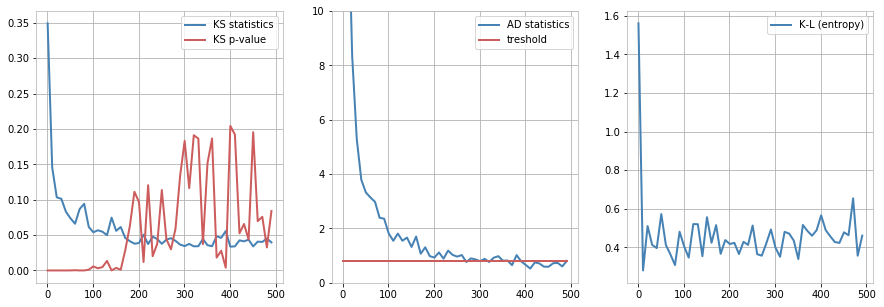

In [10]:
fig = plt.figure(figsize = (15,5))
fig.add_subplot(131)
plt.plot(narray, ks_s_b, label='KS statistics')
plt.plot(narray, ks_p_b, label='KS p-value')
plt.legend()

fig.add_subplot(132)
plt.plot(narray, ad_b,  label='AD statistics')
plt.plot([narray[0], narray[-1]],[threshold, threshold], label="treshold")
plt.ylim(0,10) #limit the y range or you cannot see the relevant part
plt.legend()

fig.add_subplot(133)
plt.plot(narray, kl_b, label='K-L (entropy)')

plt.legend();

### Figure 2. The outcome of fitting into the Gaussian distribution changes as the parameter of the sample Binomial distribution changes in three goodness of fit tests.
Three tests are KS, AD, and K-L. Here the Null Hypothesis is that the 'Binomial sample' is drawed from the Gaussian distribution. The first graph is __KS test__: P-value gets larger from 0 when sample size n gets larger, and KS statistics gets smaller. Generally it gets harder to reject the Null hypothesis, meaning the Binomial distribution is like the Gaussian distribution when n is large. The second graph is __AD test__: AD statistics gets smaller to the threshold when sample size n gets larger. Generally it gets harder to reject the Null hypothesis. The third graph is __K-L test__: K-L statistics gets smaller when sample size n gets larger. Generaaly less information gets lost in this Gaussian approximaiton.

# POISSON - repeat the exercise for the Poisson distribution increasing the lambda parameter of the distribution

In [11]:


#to store the data i am generating an empty array of the size of the values of n i want to test. i do that with np.zeros which takes the length of the array as argument, and the data type as optional argument, but default is float, which is fine by me, so i do not need any argument other then the lenght 
narray = range(1,500,10)
ks_p_b = np.zeros(len(narray)) # the returned p-value
ks_s_b = np.zeros(len(narray)) # the value of the statistics
ad_b = np.zeros(len(narray))
kl_b = np.zeros(len(narray))
chi2_b = np.zeros(len(narray))

#then i put the tests in a for loop so that i can generate a distribution for given parameters once, 
#and run all tests against it
#now the valus that i want to plot depends on how i intend to describe the plot, and viceversa. 

#here is one way to plot it, knowing the values i get for the tests when 
#i throw in a poisson distribution with low l and compare it with a gaussian and 
#assuming that that is a vary bad match

for i,n in enumerate(narray):
    #generate the distribution
    dist = (np.random.poisson(n, 1000) - n ) / np.sqrt(n)
    #run the tests. 
    ks_s_b[i] = scipy.stats.kstest(dist,'norm')[0]
    ks_p_b[i] = scipy.stats.kstest(dist,'norm')[1]
    #print scipy.stats.kstest(dist,'norm')
    #print scipy.stats.anderson(dist, dist='norm')
    ad_b[i] = scipy.stats.anderson(dist, dist='norm')[0]
    #ad_b[i] = ad_b[i] / ad_b[0]
    #print ad_b[i]
  
    # for KL and Pearson's chisq I have to simulate the normal distribution as well
    mybins=np.linspace(min(dist),max(dist), 10) 
    bincenters = mybins[:-1]+0.5*(mybins[1]-mybins[0])

    #when i was coding this up something was wrong. i put some plots in to figure out what... just so you know.
    #if i%10 == 0: 
    #    pl.hist(dist, bins=mybins)
    #    pl.plot(bincenters, scipy.stats.norm.pdf(bincenters)*1000)
    kl_b [i] =  scipy.stats.entropy(np.histogram(dist, bins=mybins)[0], scipy.stats.norm.pdf(bincenters)+n)
  

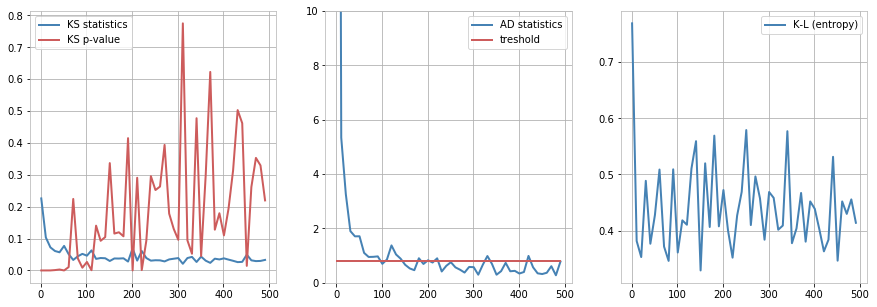

In [12]:
fig = plt.figure(figsize = (15,5))
fig.add_subplot(131)
plt.plot(narray, ks_s_b, label='KS statistics')
plt.plot(narray, ks_p_b, label='KS p-value')
plt.legend()

fig.add_subplot(132)
plt.plot(narray, ad_b,  label='AD statistics')
plt.plot([narray[0], narray[-1]],[threshold, threshold], label="treshold")
plt.ylim(0,10) #limit the y range or you cannot see the relevant part
plt.legend()

fig.add_subplot(133)
plt.plot(narray, kl_b, label='K-L (entropy)')

plt.legend();

# NOTE on KL divergence: the KL divergence is a measure of how much approximation you have to do to represent one distribution with the other in terms of information content. You can see what it looks point by point, before you integrate and get a single distance number

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log10
  import sys
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in multiply
  import sys


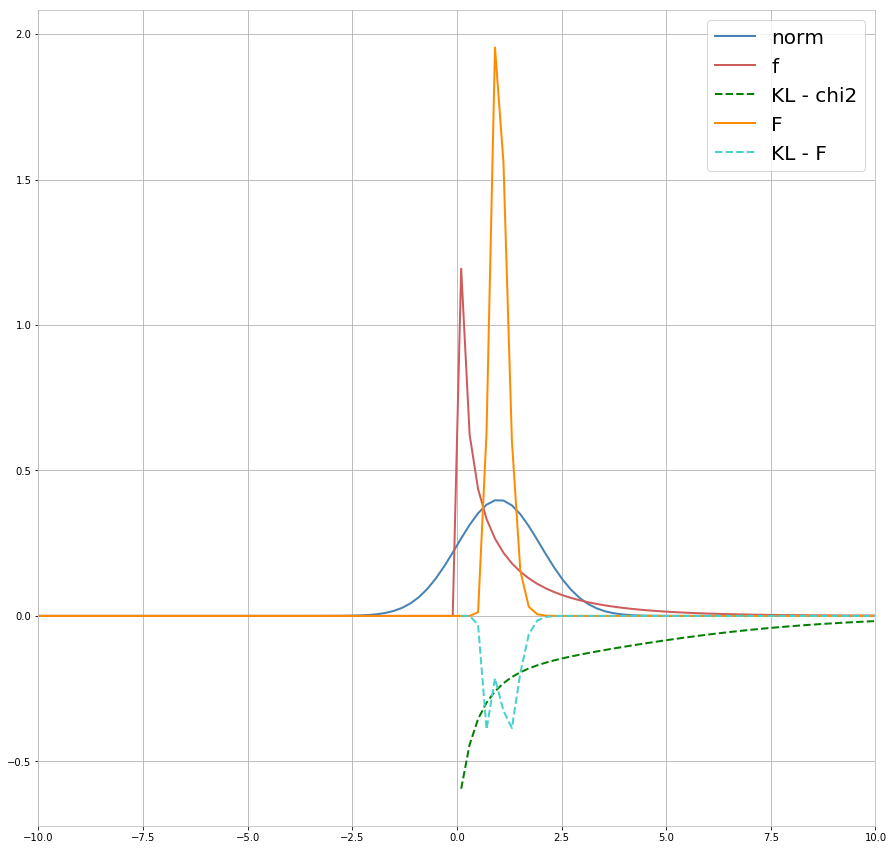

In [21]:
plt.figure(figsize=(15,15))

q = lambda x, mu : scipy.stats.distributions.norm.pdf(x - mu)
c = lambda x, mu : scipy.stats.distributions.chi2.pdf(x, df=mu)
f = lambda x, mu : scipy.stats.distributions.f.pdf(x,100,100)

Dkl = lambda x ,mu, p :  p(x, mu) * np.log10(q(x, mu)) + p(x, mu) * np.log10(p(x, mu))

def model(x) : 
    #gaussian model from scratch
    return 1. / (s * np.sqrt(2 * np.pi)) * np.exp(- ((x - m)**2 / 2. / s**2))

x = np.linspace(-10,10,100)
plt.plot(x, q(x, 1), label='norm')

#print np.nansum(Dkl(np.linspace(0,30,1000), 1, p))

plt.plot(x, c(x,1), label='f')
plt.plot(x,Dkl(x, 1, c), '--', label = 'KL - chi2')

#print np.nansum(Dkl(np.linspace(0,30,1000), 1, c))

plt.plot(x, f(x,1), label='F')
plt.plot(x, Dkl(x, 1, f), '--', label = 'KL - F')

#print np.nansum(Dkl(np.linspace(0,30,1000), 1, f))
bins = np.arange(0, 99, 10)

plt.xlim(-10, 10)
plt.legend(fontsize = 20);

In [14]:
Dkl(x, 1, c)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log10
  import sys
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in multiply
  import sys


array([        nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
       -0.59407414, -0.44233408, -0.35441302, -0.29819703, -0.25939059,
       -0.23126611, -0.21012595, -0.19372996, -0.18063395, -0.16986826,
       -0.16076424, -0.15285294, -0.14580222, -0.13937585, -0.133406  ,
       -0.12777411, -0.12239741, -0.11721912, -0.11220135, -0.10

In [24]:
x = np.linspace(-10,10,100)
c = lambda x, mu : scipy.stats.distributions.chi2.pdf(x, df=mu)
c(x,1)/q(x,1)

array([  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,

In [20]:
p?